# Pauli Measurement

In the field of quantum machine learning, Pauli measurements are commonly used to obtain the expectation value of a quantum circuit.

## Creating isQ Code

Create a new `.isq` file named `pauli_measurement.isq`, and place it in the same directory. This file should define a quantum circuit that includes the necessary operations for performing measurements in the Pauli basis.

```c++
import std;

qbit q[1];
int pauli_inx[] = [2]; // this means Z0

// using arrays for pauli measurement
// X:0, Y:1, Z:2, I:3
// examples:
// int pauli_inx[] = {2, 2} -> Z0Z1
// int pauli_inx[] = {0, 1, 2, 3} -> X0Y1Z2I3
// int pauli_inx[] = {1} -> Y0

unit pauli(int puali_idx[], qbit q[]) {
    for i in 0:puali_idx.length {
        if (puali_idx[i] == 0) {
            H(q[i]);
            M(q[i]);
        }
        if (puali_idx[i] == 1) {
            X2P(q[i]);
            M(q[i]);
        }
        if (puali_idx[i] == 2) {
            M(q[i]);
        }
        if (puali_idx[i] == 3) {
            continue;
        }
    }
}

unit main() {
    Ry(1.0, q[0]);
    pauli(pauli_inx, q);
    // Z0 measure
}
```

We use `tempfile`to simulate here.

In [1]:
FILE_CONTENT = """\
import std;

qbit q[1];
int pauli_inx[] = [2]; // this means Z0

// using arrays for pauli measurement
// X:0, Y:1, Z:2, I:3
// examples:
// int pauli_inx[] = {2, 2} -> Z0Z1
// int pauli_inx[] = {0, 1, 2, 3} -> X0Y1Z2I3
// int pauli_inx[] = {1} -> Y0

unit pauli(int puali_idx[], qbit q[]) {
    for i in 0:puali_idx.length {
        if (puali_idx[i] == 0) {
            H(q[i]);
            M(q[i]);
        }
        if (puali_idx[i] == 1) {
            X2P(q[i]);
            M(q[i]);
        }
        if (puali_idx[i] == 2) {
            M(q[i]);
        }
        if (puali_idx[i] == 3) {
            continue;
        }
    }
}

unit main() {
    Ry(1.0, q[0]);
    pauli(pauli_inx, q);
    // Z0 measure
}"""

## Pauli Measurement

The file `pauli_measurement.isq` provides an example of how to perform Pauli measurements. Please refer carefully to the comments in the `.isq` file for detailed explanations.

After creating an instance of `IsqCircuit` (e.g., `qc`), you can perform a Pauli measurement by calling `qc.pauli_measure()`. This function returns the result of the Pauli measurement, with the output value ranging from −1 to 1.

0.5403023058681398


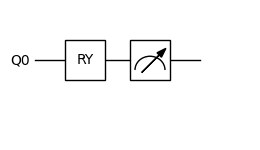

In [2]:
import tempfile
from pathlib import Path

from isqtools import IsqCircuit
from isqtools.backend import NumpyBackend
from isqtools.draw import Drawer

with tempfile.TemporaryDirectory() as temp_dir:
    temp_dir_path = Path(temp_dir)
    temp_file_path = temp_dir_path / "pauli_measurement.isq"
    with open(temp_file_path, "w") as temp_file:
        temp_file.write(FILE_CONTENT)
    backend = NumpyBackend()
    qc = IsqCircuit(
        file=str(temp_file_path),
        backend=backend,
        sample=False,
    )

    print(qc.pauli_measure())
    dr = Drawer()
    dr.plot(qc.qcis)

## Environment Information

The following versions of software and libraries are used in this tutorial:

In [3]:
import platform
import subprocess
from importlib.metadata import version

print(f"Python version used in this tutorial: {platform.python_version()}")
print(f"Execution environment: {platform.system()} {platform.release()}\n")


isqc_version = subprocess.check_output(
    ["isqc", "-V"], stderr=subprocess.STDOUT, text=True
).strip()
print(f"isqc version: {isqc_version}")

isqtools_version = version("isqtools")
print(f"isqtools version: {isqtools_version}")

numpy_version = version("numpy")
print(f"NumPy version: {numpy_version}")

Python version used in this tutorial: 3.13.5
Execution environment: Linux 6.12.41

isqc version: isQ Compiler 0.2.5
isqtools version: 1.3.0
NumPy version: 2.3.1
